In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir("/content/drive/Shareddrives/機器學習/AOI data") #這邊輸入欲使用的資料夾路徑
os.getcwd()

'/content/drive/Shareddrives/機器學習/AOI data'

In [6]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 17.0 MB/s 


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import cv2
import seaborn as sns
import mahotas
import glob
import argparse
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [8]:
train = pd.read_csv("AOI_test_check.csv")
train.head()

,ID,Label
0,test_00000.png,NaN
1,test_00001.png,NaN
2,test_00002.png,NaN
3,test_00003.png,NaN
4,test_00004.png,NaN


In [9]:
data_path = "AOI_Test_Image" #路徑掛載到存放圖片的資料夾路徑

image shape: (512, 512, 3)
data type: uint8
min: 118, max: 215


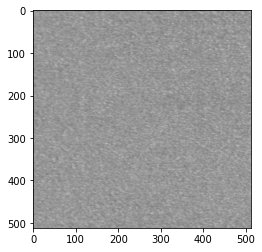

In [10]:
# 挑選一張切割前的原圖
img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [11]:
# 設置切割參數
crop = [ [0,256,0,256], [0,256,256,512], [256,512,0,256], [256,512,256,512] ] # 左上 右上 左下 右下

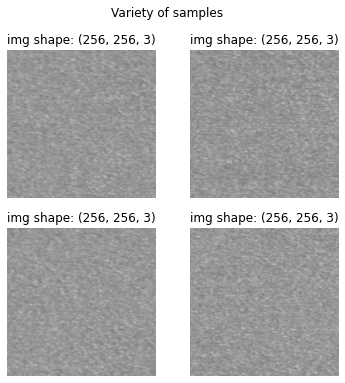

In [12]:
# 切割成2*2個子圖的效果
plt.figure(figsize=(6, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

In [13]:
import statistics
a=img.reshape(-1)

In [14]:
# 左上子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[0][0]:crop[0][1], crop[0][2]:crop[0][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001869,27.528768,0.837304,84.601982,0.211717,301.134589,310.879159,6.156166,9.557909,0.000474,3.514932,-0.168519,0.909816
1,0.001271,71.089719,0.580039,84.638518,0.141921,301.138224,267.464354,6.056263,10.113260,0.000297,4.167880,-0.062245,0.691238
2,0.001298,67.934712,0.598571,84.616016,0.144831,301.139032,270.529353,6.063913,10.087373,0.000305,4.135003,-0.067163,0.709879
3,0.001218,80.243845,0.525953,84.637060,0.133817,301.137962,258.304396,6.032380,10.173710,0.000279,4.252262,-0.050657,0.640831


In [15]:
# 右上子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[1][0]:crop[1][1], crop[1][2]:crop[1][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001481,36.003217,0.830454,106.175303,0.189654,299.033395,388.697996,6.305872,9.883182,0.000405,3.700050,-0.159696,0.905585
1,0.000996,97.922261,0.538737,106.145846,0.124680,299.036448,326.661124,6.191992,10.455336,0.000247,4.389601,-0.053087,0.659223
2,0.001022,92.620910,0.563440,106.080302,0.128422,299.039047,331.700298,6.203026,10.424556,0.000255,4.350937,-0.058678,0.683742
3,0.000963,108.934287,0.486865,106.145849,0.119095,299.036309,315.649108,6.169687,10.505878,0.000234,4.465493,-0.043674,0.611900


In [16]:
# 左下子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[2][0]:crop[2][1], crop[2][2]:crop[2][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001816,28.728722,0.830649,84.820039,0.206195,302.320879,310.551433,6.156080,9.587769,0.000453,3.543308,-0.163601,0.904892
1,0.001264,70.704591,0.583272,84.833078,0.142916,302.334333,268.627722,6.059745,10.111322,0.000289,4.166022,-0.063358,0.695682
2,0.001294,67.215901,0.603711,84.806574,0.147345,302.330055,272.010396,6.069032,10.082233,0.000298,4.130340,-0.068847,0.716031
3,0.001212,80.084675,0.527982,84.832201,0.135377,302.334425,259.244131,6.035379,10.174830,0.000272,4.251998,-0.051192,0.643480


In [17]:
# 右下子圖特徵
img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[3][0]:crop[3][1], crop[3][2]:crop[3][3]]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pd.DataFrame(mahotas.features.haralick(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001458,37.536734,0.819459,103.956453,0.187132,302.961857,378.289078,6.290859,9.900079,0.000389,3.729599,-0.152625,0.897336
1,0.000999,97.967043,0.529103,104.021826,0.124781,302.980807,318.120262,6.177324,10.444982,0.000242,4.392504,-0.051129,0.649556
2,0.001020,92.760968,0.554078,104.010334,0.127008,302.985570,323.280368,6.188326,10.416638,0.000249,4.353749,-0.056401,0.673563
3,0.000957,110.516801,0.468777,104.021182,0.116494,302.980992,305.567928,6.150293,10.503546,0.000227,4.476795,-0.040201,0.591681


In [18]:
# 將2*2個子圖的特徵合併成一個dataframe（上述四個dataframe合併）
df_hara = pd.DataFrame()
for i in range(4):
  img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  df_hara = df_hara.append(list(mahotas.features.haralick(image)))

df_hara

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001869,27.528768,0.837304,84.601982,0.211717,301.134589,310.879159,6.156166,9.557909,0.000474,3.514932,-0.168519,0.909816
1,0.001271,71.089719,0.580039,84.638518,0.141921,301.138224,267.464354,6.056263,10.113260,0.000297,4.167880,-0.062245,0.691238
2,0.001298,67.934712,0.598571,84.616016,0.144831,301.139032,270.529353,6.063913,10.087373,0.000305,4.135003,-0.067163,0.709879
3,0.001218,80.243845,0.525953,84.637060,0.133817,301.137962,258.304396,6.032380,10.173710,0.000279,4.252262,-0.050657,0.640831
0,0.001481,36.003217,0.830454,106.175303,0.189654,299.033395,388.697996,6.305872,9.883182,0.000405,3.700050,-0.159696,0.905585
1,0.000996,97.922261,0.538737,106.145846,0.124680,299.036448,326.661124,6.191992,10.455336,0.000247,4.389601,-0.053087,0.659223
2,0.001022,92.620910,0.563440,106.080302,0.128422,299.039047,331.700298,6.203026,10.424556,0.000255,4.350937,-0.058678,0.683742
3,0.000963,108.934287,0.486865,106.145849,0.119095,299.036309,315.649108,6.169687,10.505878,0.000234,4.465493,-0.043674,0.611900
0,0.001816,28.728722,0.830649,84.820039,0.206195,302.320879,310.551433,6.156080,9.587769,0.000453,3.543308,-0.163601,0.904892
1,0.001264,70.704591,0.583272,84.833078,0.142916,302.334333,268.627722,6.059745,10.111322,0.000289,4.166022,-0.063358,0.695682


In [19]:
# 2*2個子圖合併計算各個特徵的平均m(X0:X12)、變異v(X13:X25)、偏度s(X26:X38)、峰度k(X39:X51)，合併成一個row
# 也就是df_hara的column m,v,s,k
df_mvsk = pd.DataFrame()
df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

df_mvsk

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.001259,72.987072,0.6174,94.89641,0.148836,301.370245,306.598569,6.144146,10.151413,0.000307,...,-2.276855,-0.218935,-1.138201,-0.029669,-0.579439,-0.328321,0.083776,-0.4553,-0.459934,-0.681132


In [20]:
# 計算test圖片的2*2個子圖之特徵之特徵m,v,s,k

df_crop22 = pd.DataFrame()

test = [320,321,322]

#for i in range(len(train)):
for j in test:

  # 將2*2個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(4):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop22的的一個row
  df_crop22 = pd.concat([df_crop22, df_mvsk])

df_crop22

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.001259,72.987072,0.617400,94.896410,0.148836,301.370245,306.598569,6.144146,10.151413,0.000307,...,-2.276855,-0.218935,-1.138201,-0.029669,-0.579439,-0.328321,0.083776,-0.455300,-0.459934,-0.681132
0,0.000549,179.395316,0.567492,206.733339,0.096432,351.905028,647.538038,6.677937,11.329865,0.000156,...,-2.284382,-0.729757,-1.297101,-0.404485,-0.633479,-0.725668,-0.828724,-1.010703,-1.223122,-1.586339
0,0.004324,5.738833,0.962472,77.091831,0.403970,291.583443,302.628491,6.126661,8.370112,0.001092,...,-0.758579,-1.519342,-1.796799,-0.763403,-0.874544,-1.403077,-1.304317,-1.519107,-1.442859,-1.429258


In [21]:
# 計算所有圖片的2*2個子圖之特徵之特徵m,v,s,k

df_crop22 = pd.DataFrame()

for j in range(len(train)):

  # 將2*2個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(4):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop22的的一個row
  df_crop22 = pd.concat([df_crop22, df_mvsk])

df_crop22

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.002961,2.054137,0.997493,411.427779,0.559920,394.972269,1643.656978,7.336809,8.823044,0.001261,...,-1.511790,-1.750922,-1.646497,-1.509237,-1.440983,-1.744168,-1.594828,-1.662163,-1.719400,-1.494042
0,0.000436,382.603592,0.084015,208.613571,0.065669,335.424154,451.850692,6.421225,11.629316,0.000101,...,-1.834208,0.590072,-0.463502,0.170327,-0.365810,-1.503819,0.000000,0.161707,-0.326665,-0.490679
0,0.000445,341.338175,0.198725,212.037202,0.070243,307.004862,506.810631,6.497639,11.604666,0.000112,...,-1.224627,-0.321648,-2.201192,1.164857,0.302553,-0.628967,0.000000,-0.469909,-0.415069,-0.526845
0,0.003047,8.047236,0.962953,108.624888,0.359973,324.774177,426.452316,6.384190,8.855333,0.000878,...,-1.346297,-0.987855,-1.838074,-0.953060,-1.195794,-0.980562,-0.833632,-0.973666,-0.991358,-1.476024
0,0.002002,34.287008,0.741351,66.023184,0.197873,299.315884,229.805728,5.941609,9.464970,0.000452,...,-2.125216,-0.699209,-2.013925,-1.354355,-1.420920,-0.708519,-0.332382,-0.738968,-0.746086,-0.845512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000431,53.138668,0.970864,919.286113,0.172967,360.168137,3624.005786,7.900839,11.668276,0.000292,...,-1.366483,-2.159248,-0.914452,-1.349949,-1.293963,-1.846336,-2.157116,-2.192814,-2.117256,-1.832434
0,0.001256,41.027985,0.870549,397.205686,0.185043,343.433933,1547.794758,6.718185,10.349659,0.000375,...,-2.241705,-0.267127,-2.260089,-2.241446,-2.214614,-2.024314,-0.444684,-0.624250,-1.298411,-0.173585
0,0.000118,1351.257295,0.246888,905.705654,0.041046,360.281044,2271.565321,7.570277,13.450260,0.000056,...,-1.095205,-0.415638,-1.396291,0.508725,-0.799671,-0.319757,-0.404302,-0.421013,-0.382527,-0.625408
0,0.000476,321.226308,0.207146,201.940833,0.073712,295.515757,486.537026,6.466008,11.514679,0.000121,...,-2.135975,0.184708,-2.159919,0.561342,-0.247189,-0.901555,0.809846,-0.177335,-0.371113,-0.475183


In [22]:
# column name
col_names = []
for i in range(52):
  col_names.append("X"+str(i))
df_crop22.columns = col_names
df_crop22

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0.002961,2.054137,0.997493,411.427779,0.559920,394.972269,1643.656978,7.336809,8.823044,0.001261,...,-1.511790,-1.750922,-1.646497,-1.509237,-1.440983,-1.744168,-1.594828,-1.662163,-1.719400,-1.494042
0,0.000436,382.603592,0.084015,208.613571,0.065669,335.424154,451.850692,6.421225,11.629316,0.000101,...,-1.834208,0.590072,-0.463502,0.170327,-0.365810,-1.503819,0.000000,0.161707,-0.326665,-0.490679
0,0.000445,341.338175,0.198725,212.037202,0.070243,307.004862,506.810631,6.497639,11.604666,0.000112,...,-1.224627,-0.321648,-2.201192,1.164857,0.302553,-0.628967,0.000000,-0.469909,-0.415069,-0.526845
0,0.003047,8.047236,0.962953,108.624888,0.359973,324.774177,426.452316,6.384190,8.855333,0.000878,...,-1.346297,-0.987855,-1.838074,-0.953060,-1.195794,-0.980562,-0.833632,-0.973666,-0.991358,-1.476024
0,0.002002,34.287008,0.741351,66.023184,0.197873,299.315884,229.805728,5.941609,9.464970,0.000452,...,-2.125216,-0.699209,-2.013925,-1.354355,-1.420920,-0.708519,-0.332382,-0.738968,-0.746086,-0.845512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000431,53.138668,0.970864,919.286113,0.172967,360.168137,3624.005786,7.900839,11.668276,0.000292,...,-1.366483,-2.159248,-0.914452,-1.349949,-1.293963,-1.846336,-2.157116,-2.192814,-2.117256,-1.832434
0,0.001256,41.027985,0.870549,397.205686,0.185043,343.433933,1547.794758,6.718185,10.349659,0.000375,...,-2.241705,-0.267127,-2.260089,-2.241446,-2.214614,-2.024314,-0.444684,-0.624250,-1.298411,-0.173585
0,0.000118,1351.257295,0.246888,905.705654,0.041046,360.281044,2271.565321,7.570277,13.450260,0.000056,...,-1.095205,-0.415638,-1.396291,0.508725,-0.799671,-0.319757,-0.404302,-0.421013,-0.382527,-0.625408
0,0.000476,321.226308,0.207146,201.940833,0.073712,295.515757,486.537026,6.466008,11.514679,0.000121,...,-2.135975,0.184708,-2.159919,0.561342,-0.247189,-0.901555,0.809846,-0.177335,-0.371113,-0.475183


In [23]:
# csv output
df_crop22_output = df_crop22.copy()

#df_crop22_output.index = train["Label"].index
#df_crop22_output = pd.concat([df_crop22_output,train["Label"]],axis = 1)
df_crop22_output

df_crop22_output.to_csv("/content/drive/Shareddrives/機器學習/第三次討論/crop csv/test_crop2x2.csv")